In [13]:
!pip install tensorflow
!pip install numpy
!pip install matplotlib

import matplotlib.pyplot as plt
import matplotlib.image as img

import numpy as np

import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [14]:
#set the dataset path
#data_dir = "/content/drive/MyDrive/new_tea sickness dataset (1)"
data_dir = "C:\\Users\\DELL\\Desktop\\python_ws\\tea sickness dataset"
#http://localhost:8888/tree/tea%20sickness%20dataset

In [15]:
#set image size batch size for pre processing
img_height,img_width=180,180
batch_size=32

In [16]:
#devide dataset for trainig
import tensorflow as tf

# Rest of your code using 'tf'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 885 files belonging to 8 classes.
Using 708 files for training.


In [17]:
#devide dataset for validation
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 885 files belonging to 8 classes.
Using 177 files for validation.


In [18]:
#get the class names from dataset
class_names = train_ds.class_names
print(class_names)

['Anthracnose', 'algal leaf', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot']


In [19]:
#our dataset have 7 classes
num_classes = 10

In [20]:
import tensorflow as tf
# Get the default graph
default_graph = tf.compat.v1.get_default_graph()

In [21]:
!pip install --upgrade keras


In [22]:
#from tensorflow.keras.layers import YourLayer

import keras
import tensorflow as tf

print("Keras version:", keras.__version__)
print("TensorFlow version:", tf.__version__)


Keras version: 3.0.5
TensorFlow version: 2.16.1


In [28]:
from keras.models import Sequential
from keras.layers import Input, Rescaling, Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Input(shape=(img_height, img_width, 3)),
    Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])


In [30]:
#compile the model
#!pip install model
from tensorflow.keras.losses import SparseCategoricalCrossentropy


model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=True, reduction='none'), metrics=['accuracy'])

In [31]:
#fit the model
!pip install model
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15


ERROR: Could not find a version that satisfies the requirement model (from versions: none)
ERROR: No matching distribution found for model
C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:599: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 626ms/step - accuracy: 0.1662 - loss: 2.5273 - val_accuracy: 0.3842 - val_loss: 1.4093
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 518ms/step - accuracy: 0.3858 - loss: 1.3042 - val_accuracy: 0.5028 - val_loss: 1.1222
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 520ms/step - accuracy: 0.5412 - loss: 1.0159 - val_accuracy: 0.5367 - val_loss: 1.0327
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 516ms/step - accuracy: 0.6478 - loss: 0.7913 - val_accuracy: 0.6384 - val_loss: 0.8743
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 549ms/step - accuracy: 0.7635 - loss: 0.6134 - val_accuracy: 0.6441 - val_loss: 1.0103
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 589ms/step - accuracy: 0.8248 - loss: 0.5613 - val_accuracy: 0.6045 - val_loss: 1.2005
Epoch 7/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 546ms/step - accuracy: 0.8421 - loss: 0.5064 - val_accuracy: 0.6215 - val_loss: 1.0109
Epoch 8/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 527ms/step - accuracy: 0.8899 - loss: 0.3313 - val_accuracy: 0.649

# finally save the model


In [32]:
tf.keras.models.save_model(model,'newtea.hdf5')


In [37]:
# ======        for prediction using our trained model ============================================

from matplotlib import pyplot as plt
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

filepath = './newtea.hdf5'
model = tf.keras.models.load_model('./newtea.hdf5', compile=False)
print(model)

print("Model Loaded Successfully")

<Sequential name=sequential_2, built=True>
Model Loaded Successfully


In [ ]:
# Define a function that uses the global variable
#def print_global_variable():
  #  print("Inside the function:", global_variable)

# Call the function
#print_global_variable()

In [38]:
def predict(test_img_path):
    test_image = load_img(test_img_path, target_size = (180,180)) # load image

    test_image = img_to_array(test_image)#/255 # convert image to np array and normalize
    test_image = np.expand_dims(test_image, axis = 0)# change dimention 3D to 4D

    result = model.predict(test_image) # predict diseased palnt or not
    #print(result)

    pred = np.argmax(result, axis=1)
    pred = pred[0]
    
    expression = ['Anthracnose','algal leaf', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot','white spot']

    test_image = img.imread(test_img_path)
    print(expression[pred])
    var =  expression[pred];
    plt.imshow(test_image);
    print(var);
    return var
#predict('C:\\Users\\DELL\\Desktop\\python_ws\\tea sickness dataset\\algal leaf\\UNADJUSTEDNONRAW_thumb_17.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
algal leaf
algal leaf


'algal leaf'

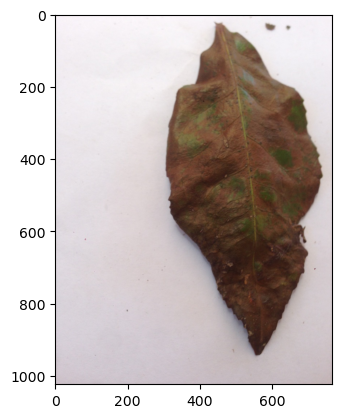

In [39]:
predict('C:\\Users\\DELL\\Desktop\\python_ws\\tea sickness dataset\\algal leaf\\UNADJUSTEDNONRAW_thumb_17.jpg')

In [ ]:
# Call the function
image_path = 'C:\\Users\\DELL\\Desktop\\python_ws\\tea sickness dataset\\algal leaf\\UNADJUSTEDNONRAW_thumb_17.jpg'

result = predict('C:\\Users\\DELL\\Desktop\\python_ws\\tea sickness dataset\\algal leaf\\UNADJUSTEDNONRAW_thumb_17.jpg')

# Print the result
print(result)

# Example Python code continued 
with open('template.html', 'r') as file:
    html_template = file.read()

# Replace the two placeholders with the actual values
html_content = html_template.replace('{{ python_variable }}', result).replace('{{ image_path }}', image_path)

# Save the result to a new HTML file
with open('output.html', 'w') as output_file:
    output_file.write(html_content)
    


In [ ]:
import pickle

# Sample data (replace this with your actual data)
data ="result"

# Specify the file path and name for the pickle file
pickle_file_path = 'example.pkl'

# Dump the data into the pickle file
with open(pickle_file_path, 'wb') as file:
    pickle.dump(data, file)

# Optionally, print a message to confirm the creation of the pickle file
print(f"Pickle file '{pickle_file_path}' created successfully.")


# New Section